In [1]:
import sys
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
import sounddevice as sd

from src.VAE.utils.data import load_random_wave

DATA_PATH = r'..\..\data\drums-one_shots'

In [33]:
wave, sr, name = load_random_wave(DATA_PATH, sample_group='crash')

print(f'name: {name}')

name: crash_0283.wav


In [34]:
stft = lb.stft(wave, n_fft=2048, hop_length=512)

mag = np.abs(stft)

print(f'stft max: {np.max(mag)}')
print(f'stft min: {np.min(mag)}')

stft max: 45.03974914550781
stft min: 2.3228999019436758e-12


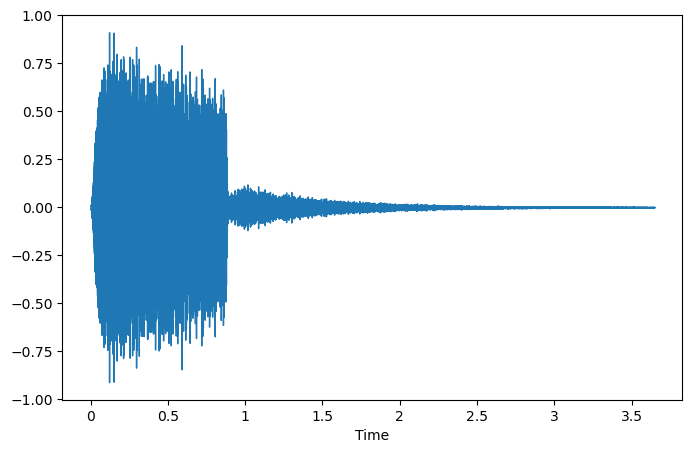

In [127]:
fig, ax = plt.subplots(figsize=(8, 5))

lb.display.waveshow(wave, sr=sr, ax=ax)

ax.set_title(f'')

plt.show()

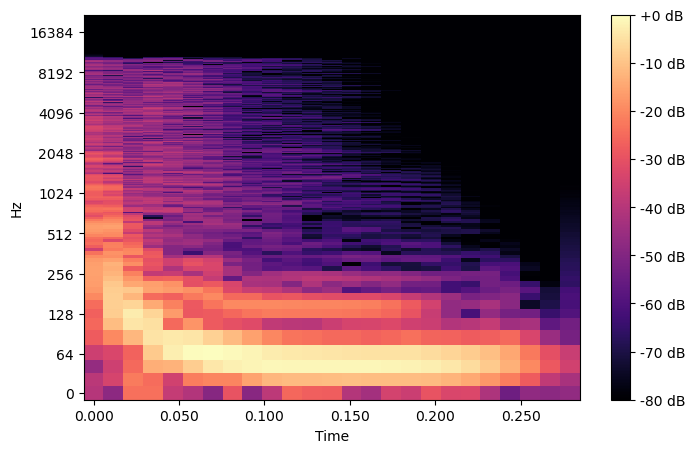

In [137]:
stft = lb.stft(wave, n_fft=2048, hop_length=512)

fig, ax = plt.subplots(figsize=(8, 5))

img = lb.display.specshow(lb.amplitude_to_db(np.abs(stft), ref=np.max), sr=sr, hop_length=512, x_axis='time', y_axis='log')

fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.show()

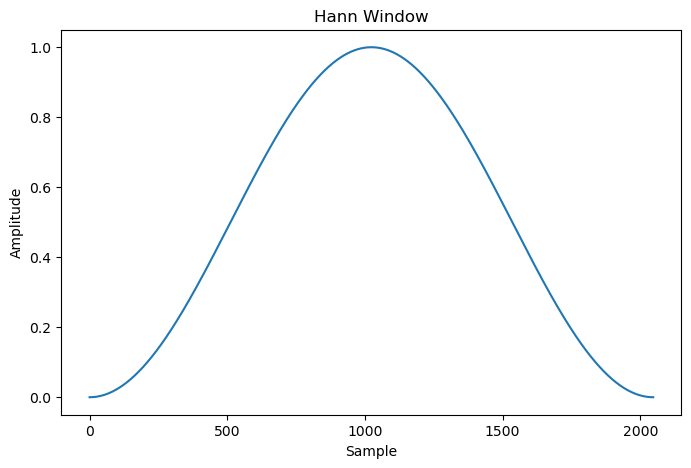

In [96]:
import numpy as np
from scipy.signal.windows import hann

import matplotlib.pyplot as plt

window = hann(2048)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(window)
ax.set_title('Hann Window')
ax.set_xlabel('Sample')
ax.set_ylabel('Amplitude')
plt.show()

Text(0.5, 1.0, 'Frame with length 2048 samples')

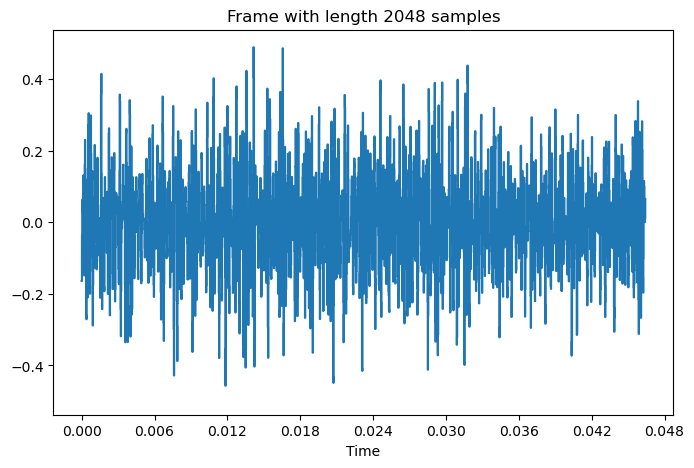

In [97]:

frame = wave[10_000:10_000 + 2048]


fig, ax = plt.subplots(figsize=(8, 5))

lb.display.waveshow(frame, sr=sr, ax=ax)

ax.set_title(f'Frame with length 2048 samples')


Text(0.5, 1.0, 'Frame with length 2048 samples multiplied by Hann window')

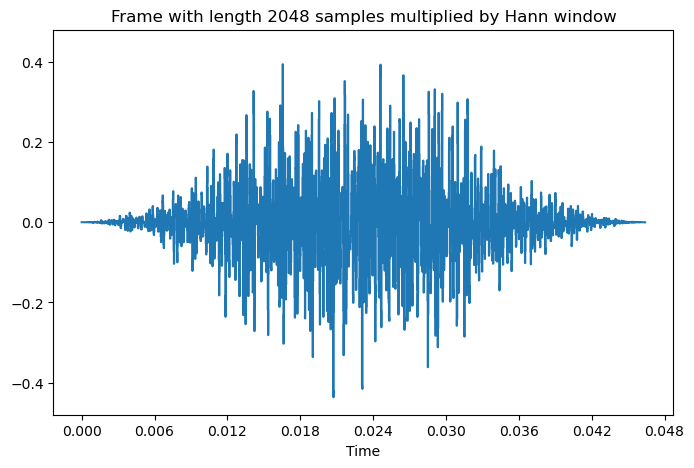

In [98]:
fromed = frame * window

fig, ax = plt.subplots(figsize=(8, 5))

lb.display.waveshow(fromed, sr=sr, ax=ax)

ax.set_title(f'Frame with length 2048 samples multiplied by Hann window')


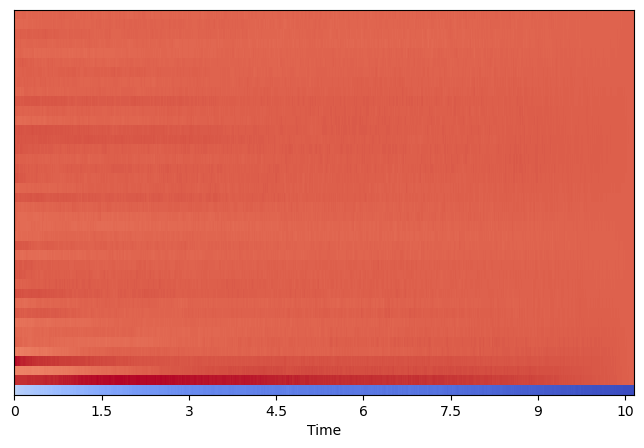

In [144]:
mfcc = lb.feature.mfcc(y=wave, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512)

fig, ax = plt.subplots(figsize=(8, 5))

lb.display.specshow(mfcc, sr=sr, hop_length=512, x_axis='time')


plt.show()


In [178]:
wave, sr, name = load_random_wave(DATA_PATH, sample_group='kick')

In [179]:
sd.play(wave, sr)

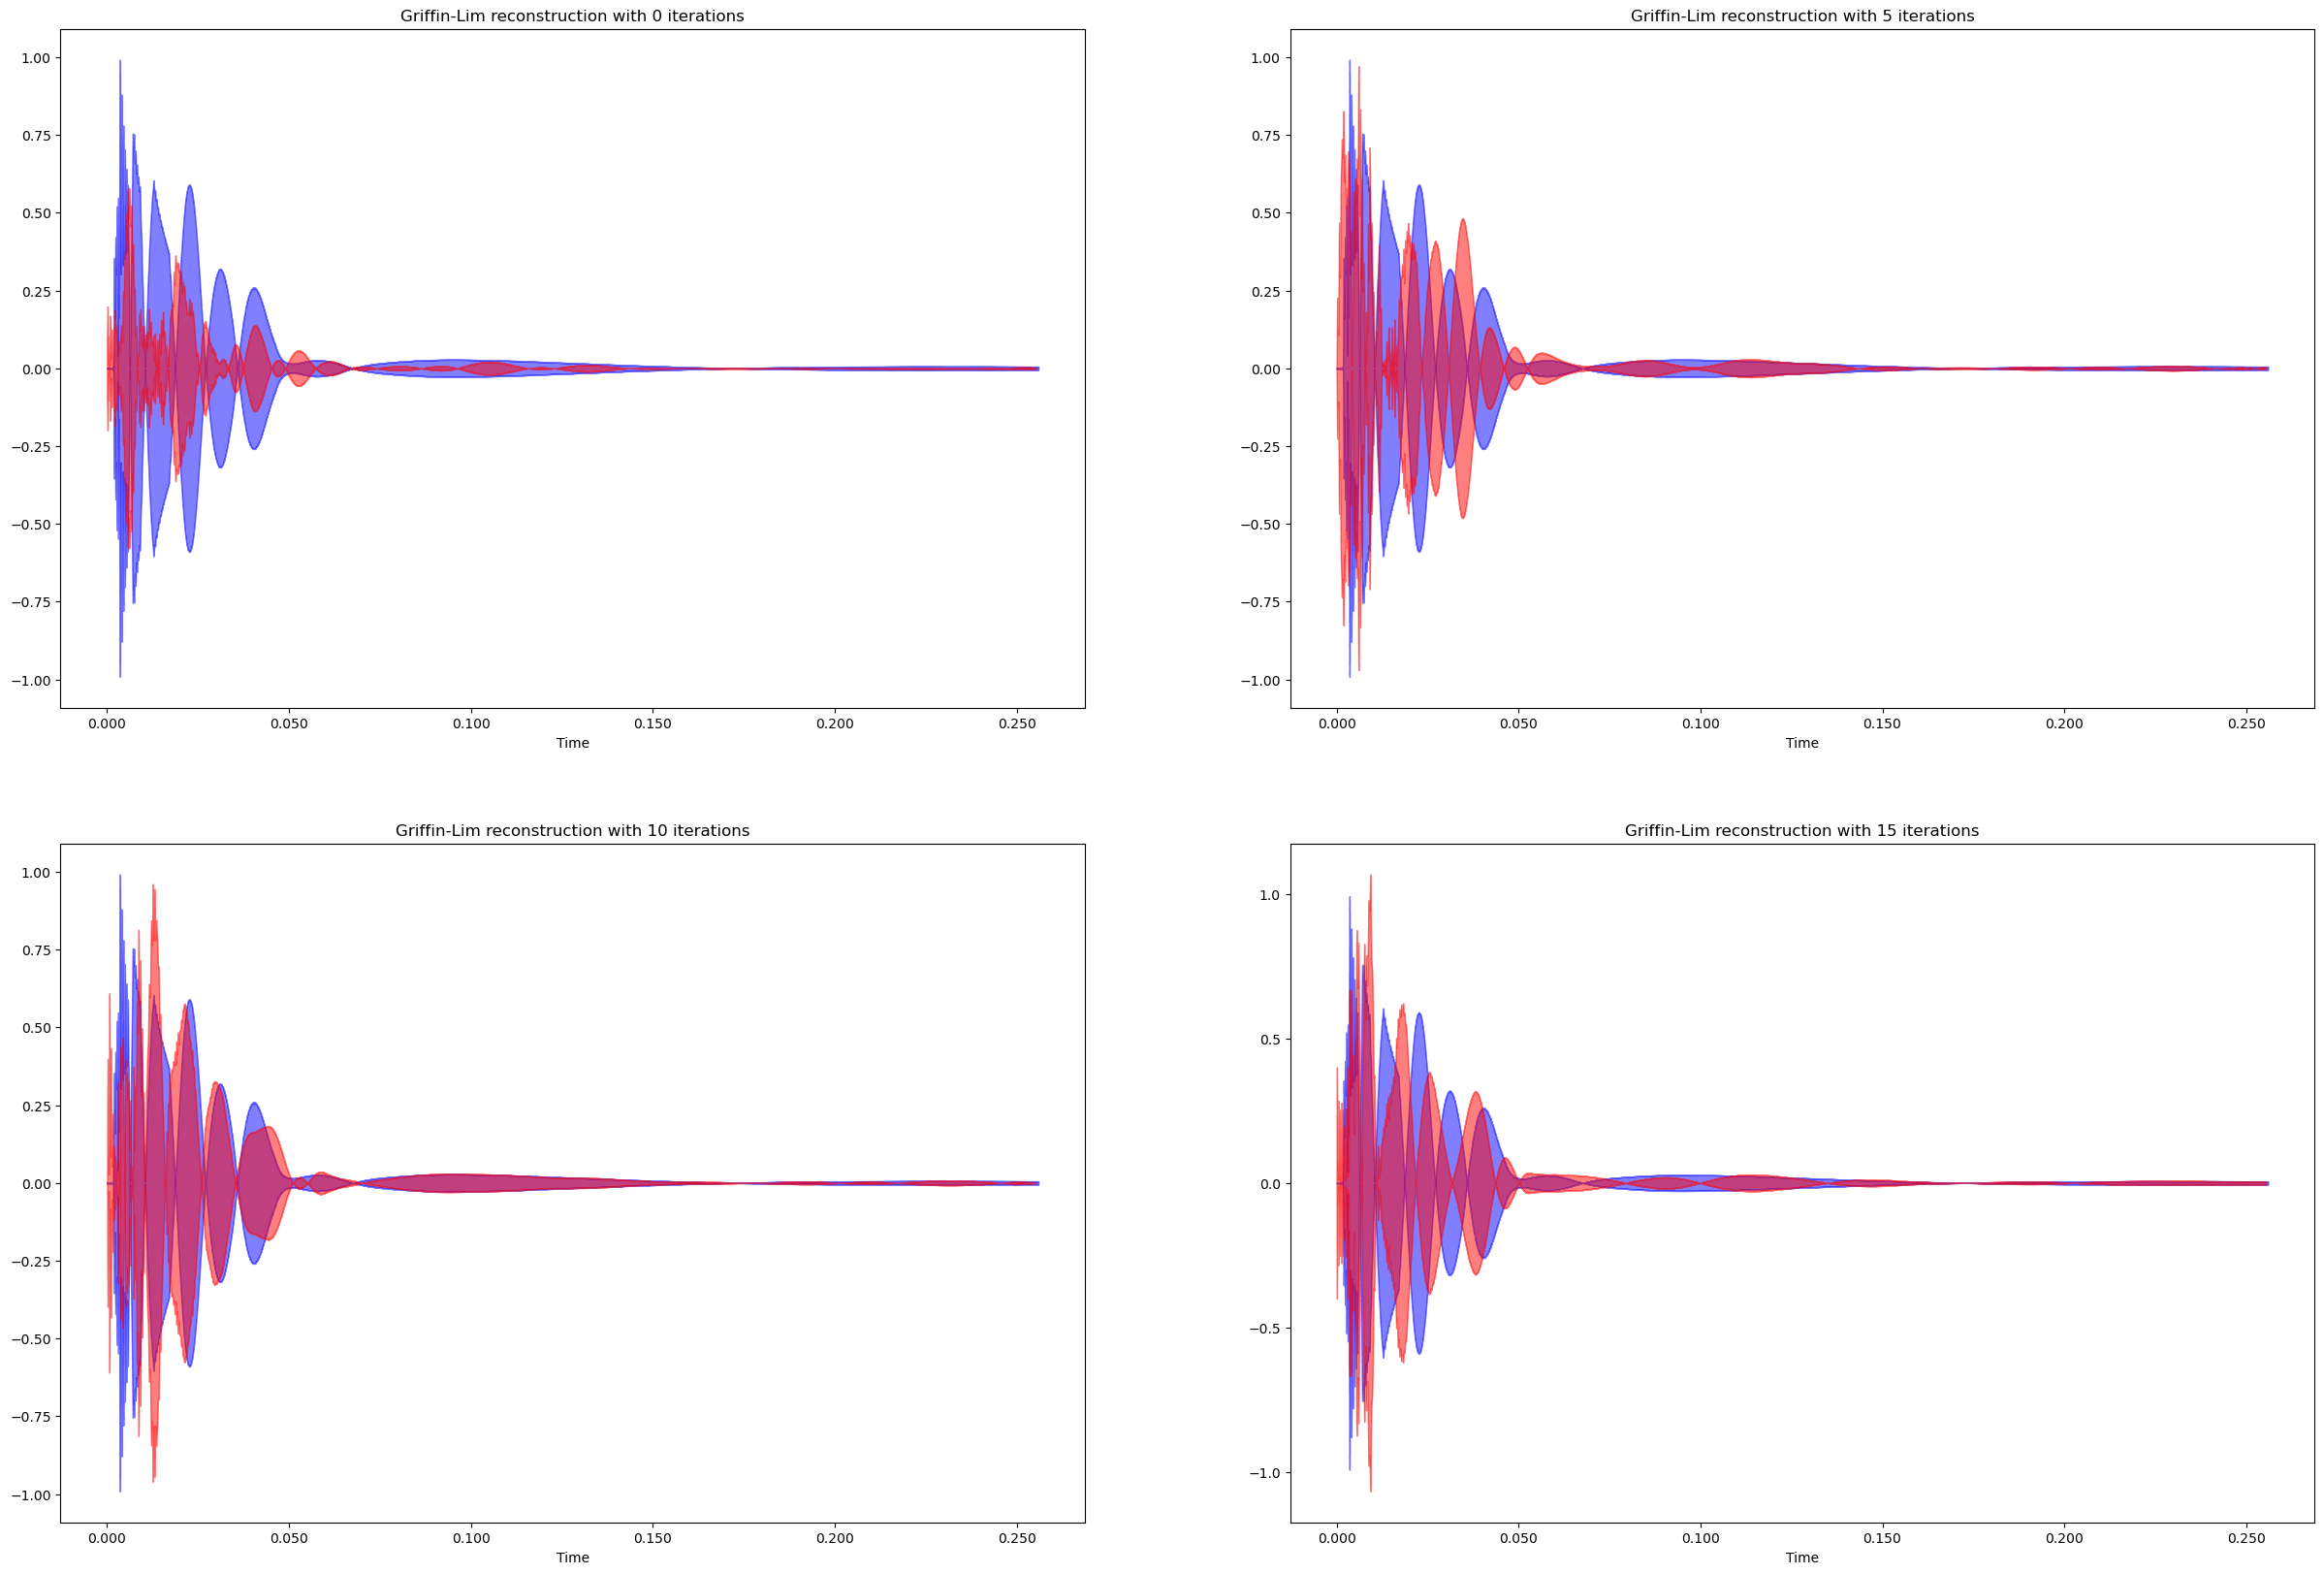

In [180]:
stft = lb.stft(wave, n_fft=2048, hop_length=512)

magnitude = np.abs(stft)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(30, 20))

axes = axes.flatten()

for i, iter in enumerate([0, 5, 10, 15]):
    x_gl = lb.griffinlim(magnitude, n_iter=i, hop_length=512)

    ax = axes[i]

    lb.display.waveshow(wave, sr=sr, ax=ax, color='b', alpha=0.5)
    lb.display.waveshow(x_gl, sr=sr, ax=ax, color='r', alpha=0.5)


    ax.set_title(f'Griffin-Lim reconstruction with {iter} iterations') 

plt.show()
